#Выявление закономерностей успешности видеоигр. Описание проекта.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно найти определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Инструкция по выполнению проекта.

Шаг 1. Откройте файл с данными и изучите общую информацию.

Шаг 2. Подготовьте данные.

Шаг 3. Проведите исследовательский анализ данных.

Шаг 4. Составьте портрет пользователя каждого региона (NA, EU, JP).

Шаг 5. Проверьте гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Шаг 6. Напишите общий вывод.


# Загрузка данных и поиск в них аномалий.

Загружаем необходимые для работы библиотеки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

Загружаем файл с данными и смотрим информацию о нём.

In [ ]:
data = pd.read_csv('/datasets/games.csv', sep = ',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выводим первые пять строк таблицы.

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Смотрим процент пропусков в каждом из столбцов.

In [ ]:
pd.DataFrame(
    round(
        data.isna().mean() * 100,
    )
).style.background_gradient("coolwarm")


,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


Смотрим уникальные значения в каждом из столбцов.

In [ ]:
for column in data.columns:
    print('Уникальные значения столбца', column, ':', data[column].unique())

Уникальные значения столбца Name : ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца Platform : ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца Year_of_Release : [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Уникальные значения столбца Genre : ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные значения столбца NA_sales : [4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 

Проверяем данные на наличие явных дубликатов.

In [ ]:
print(data.duplicated().sum())

0


Теперь делаем проверку на неявные дубликаты, ориентируемся на совпадение названий игры и платформы, на которой она вышла.

In [ ]:
data[data.duplicated(subset=['Name', 'Platform'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Все строчки с пропусками в названии игры удалим чуть позже.


Годы выпуска Need for Speed: Most Wanted на одинаковых игровых платформах разные, из чего делаю вывод, что в 2012 это был перевыпуск оригинальной игры с новой графикой и т.д.


Повторные строчки с Sonic the Hedgehog	и Madden NFL 13 на PS3 действительно являются дубликатами, удалим их.

In [ ]:
data.drop([16230, 4127], axis=0, inplace=True)

##Выводы по разделу.
- Пропуски есть в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. В последних трёх столбцах доля пропусков составляет 51%, 40% и 40% соответственно, в остальных не первышают двух процентов (столбец Year_of_Release) или вовсе единичны.
- Ошибочные типы данных: Year_of_Release (год выпуска, должно быть целым), Critic_Score (все оценки критиков положительные, тип float не нужен, достаточно int), User_Score (должен быть float, причины типа object см. далее).
- Столбец User_Score имеет тип object, так как помимо пропусков в нём встречается значение tbd. TBD = To Be Determined = будет определено позднее. Вызвано такое значение тем, что пользовательский рейтинг составляется не мгновенно, для его получения у игры должен набраться определенное количество обзоров и оценок.
- Явные дубликаты в виде повторов строк в представленных данных отсутствуют.
- Обнаружены и удалены неявные дубликаты.

# Подготовка данных.

Задачи:
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:

    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
data.columns = data.columns.str.lower() #приводим названия столбцов к нижнему регистру

Для преобразования типа данных необходимо сначала разобраться с пропусками, иначе они не позволят получить тип int у Year_of_Release и Critic_Score и float у User_Score.
Причиной пропусков в целом могли стать некачественный сбор информации и отсуствтвие полной информации по конкретным представленным играм.
Рассмотрим каждый столбец с пропусками и решим, что с ним делать.
- Name: 2 пропуска на всю таблицу, удаляем;
- Year_of_Release: 2% пропусков, искать пути уточнения значений нет смысла, удаляем;
- Genre: также 2 пропуска на всю таблицу, удаляем;
- Critic_Score: очень много пропусков (51%), но замена пропусков медианным значением по жанру игры\году её выпуска наверняка приведёт к искажению информации. Причины получения той или иной оценки игрой от критиков всегда индивидуальны и определяются целым рядом факторов, не входящих в наше исследование: качеством самой игры, соответствием результата ожиданиям от игры, рекламной компанией, ситуацией на рынке видеоигр в момент выхода и т. д. Таким образом, восстановить эти значения в рамках данной работы не получится;
- User_Score: аналогично предыдущему, но на пропуски заменим также и значения tbd, так как по своей сути они одинаковы;
- Rating: заменим пропуски на значение "no rating'.

In [ ]:
data = data.dropna(subset=['name']).reset_index(drop=True)
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data = data.dropna(subset=['genre']).reset_index(drop=True)
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan #заменяем tbd на nan

Проверяем, что получилось.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заменяем пропуски в столбце с возрастным рейтингом на значение "no_rating" и делаем проверку.

In [ ]:
data['rating'] = data['rating'].fillna('no_rating')
data['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Ещё раз смотрим на информацию о таблице для финальной проверки выполненной работы с пропусками.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мешавшие нам пропуски убраны, теперь меняем типы данных на правильные. Результат проверяем.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('float64')
data['user_score'] = data['user_score'].astype('float64')
data['critic_score'] = data['critic_score'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Тип данных успешно заменён на правильный.


Добавляем столбец с суммарными продажами по всем регионам. Выводим таблицу с добавленным новым столбцом.

In [ ]:
data["sum_sales"] = data[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(
    axis=1
)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,<NA>,NaN,no_rating,0.01
16439,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,no_rating,0.01
16440,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,no_rating,0.01
16441,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,no_rating,0.01


##Выводы по разделу.
- Все названия столбцов приведены к нижнему регистру.
- Удалены строки с пропусками, которые невозможно заполнить.
- Пропуски в столбце с возрастным рейтингом заменены на значение "no_rating".
- Заменены типы данных, где это требовалось.
- В таблицу добавлен столбец, в котором хранится значение суммарных продаж каждой конкретной игры по всему миру.

# Исследовательский анализ данных.

Ответим на заданные в условии впоросы:
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Создаём сводную таблицу, в которой будет информация о количестве выпущенных за каждый год игр, а после строим по ней график.

In [ ]:
year_of_release_pivot_table = pd.pivot_table(
    data, index="year_of_release", values="name", aggfunc="count"
)
year_of_release_pivot_table.columns = ["count"]
year_of_release_pivot_table

,count
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


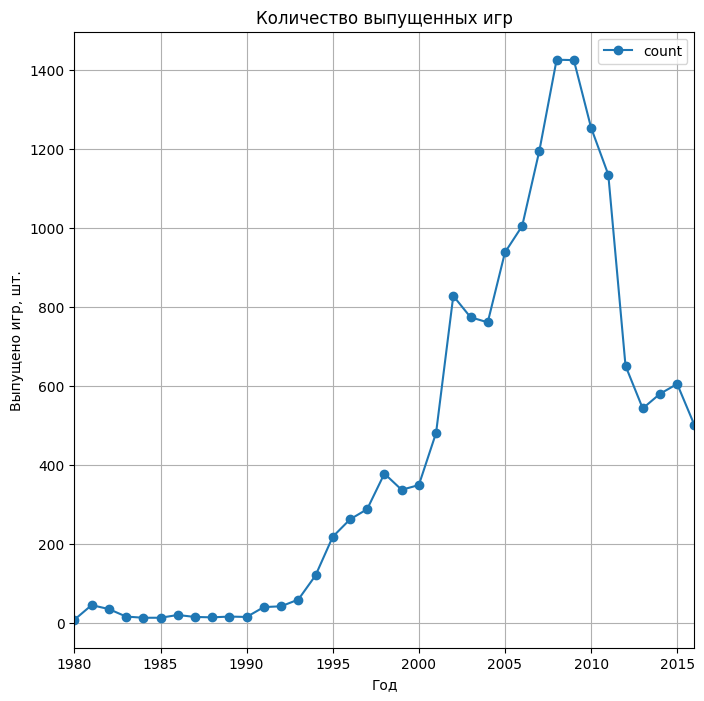

In [ ]:
year_of_release_pivot_table.plot(
    style="o-",
    xlim=(1980, 2016),
    grid=True,
    figsize=(8, 8),
    xlabel="Год",
    ylabel="Выпущено игр, шт.",
    title="Количество выпущенных игр",
);

График вполне соответствует реальности. За последние 40 лет индустрия видеоигр в целом выросла во много раз, превратившись из развлечения для единиц, созданного в основном энтузиастами, в огромный пласт массовой культур. Этот прогресс был комплексным: появлялись новые игровые консоли, персональные компьютеры становились мощнее и доступнее, игровые движки совершенствовались и создавались новые и так далее. Всё это вело к увеличению количества созданных и выпущенных игр, которые достигали потолка возможностей текущих игровых платформ, и дальше по кругу. Активный переход из одного состояния сферы видеоигр в другое как раз и происходил в 90-ые годы, а завершился в нулевые. в 2010-2016-ом пошёл спад, объяснить который можно развитием индустрии мобильных игр на смартфонах (которые заменили части аудитории полноценные видеоигры), увеличением времени и средств на разработку игр.
Ответ на поставленный в задаче вопрос: нет, данные за все периоды неважны.

Строим график сводной таблицы вида "платформа - количество суммарных продаж по миру".


<Axes: title={'center': 'Продажи игр для разных платформ'}, xlabel='Платформа', ylabel='Количество проданных копий игр, млн'>

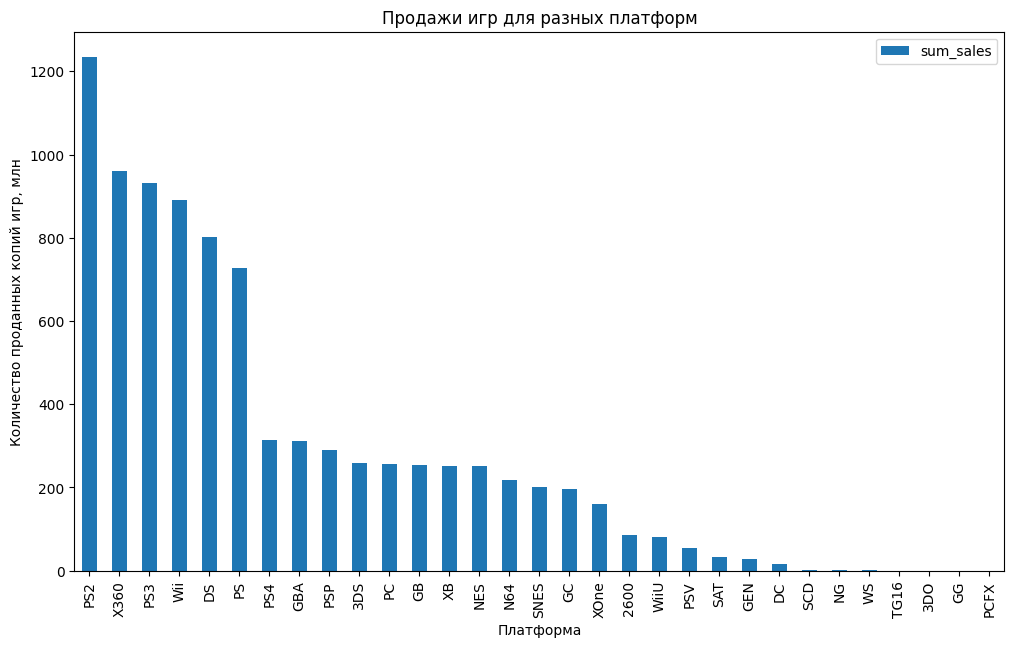

In [ ]:
platform_sum_sales_pivot_table = pd.pivot_table(
    data, index=["platform"], values="sum_sales", aggfunc="sum"
).sort_values("sum_sales", ascending=False)
platform_sum_sales_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Платформа",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр для разных платформ",
);

Берём топ-5 игровых платформ из этого списка и строим графики таблицы суммарных продаж игр для них по годам.

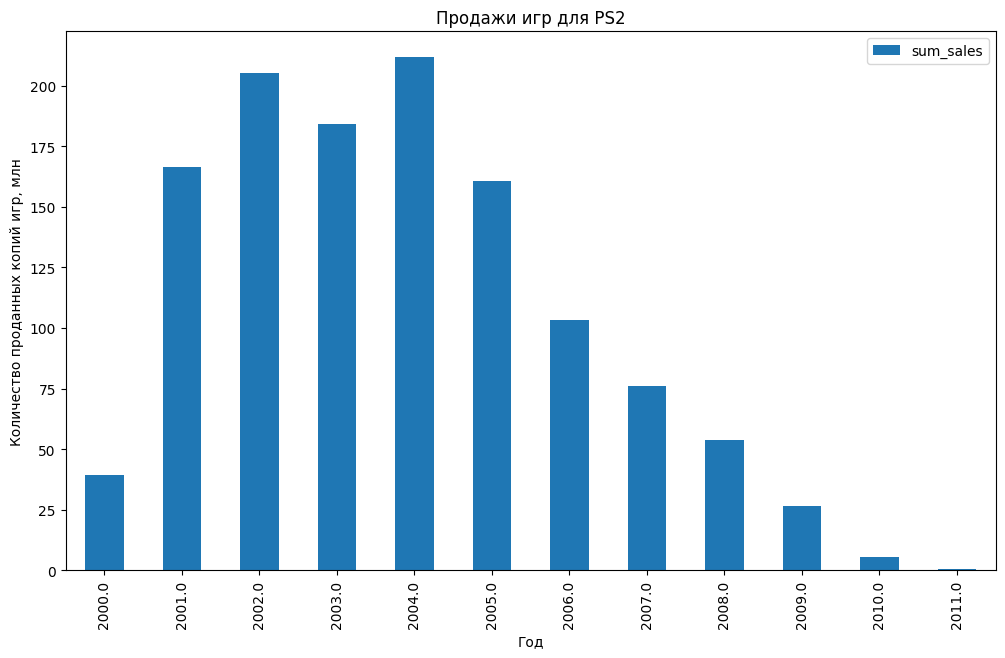

In [ ]:
ps2_sales_pivot_table = pd.pivot_table(
    data[data["platform"] == "PS2"],
    index=["year_of_release"],
    values="sum_sales",
    aggfunc="sum",
)
ps2_sales_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Год",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр для PS2",
);

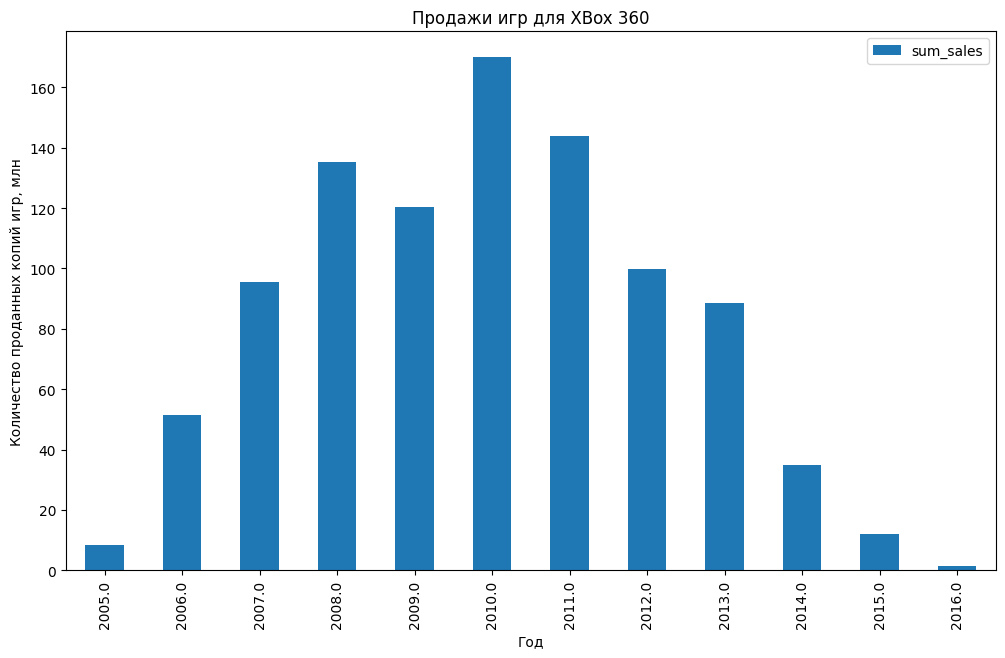

In [ ]:
x360_sales_pivot_table = pd.pivot_table(
    data[data["platform"] == "X360"],
    index=["year_of_release"],
    values="sum_sales",
    aggfunc="sum",
)
x360_sales_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Год",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр для XBox 360",
);

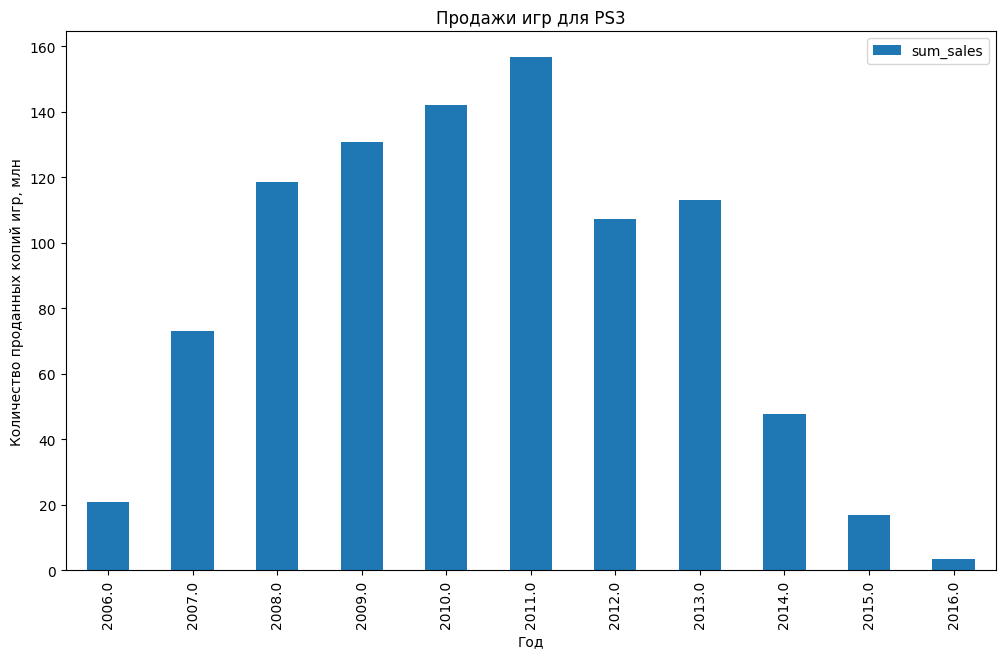

In [ ]:
ps3_sales_pivot_table = pd.pivot_table(
    data[data["platform"] == "PS3"],
    index=["year_of_release"],
    values="sum_sales",
    aggfunc="sum",
)
ps3_sales_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Год",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр для PS3",
);


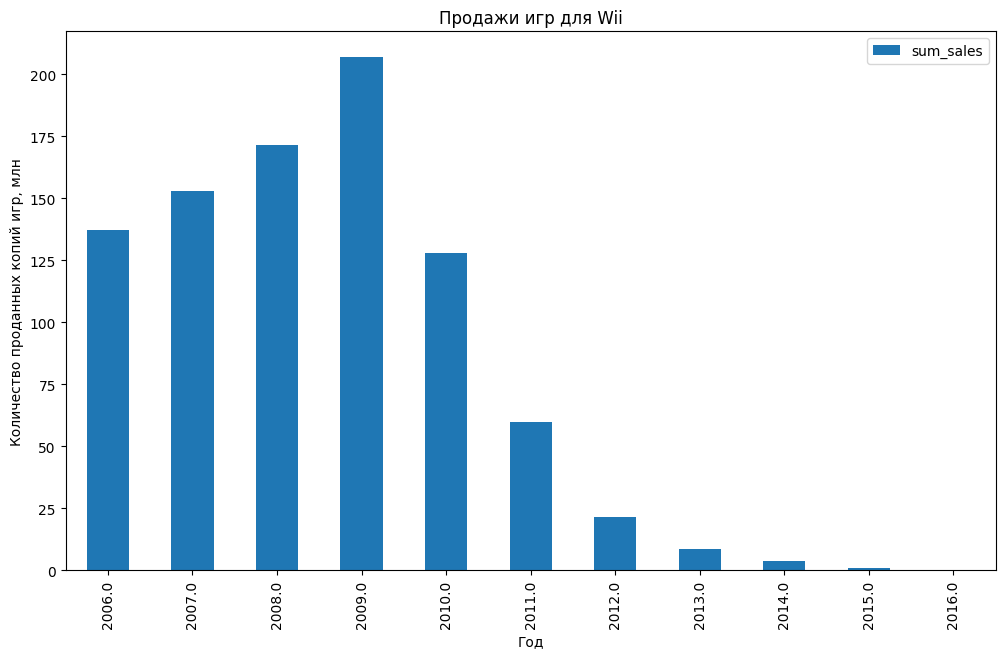

In [ ]:
wii_sales_pivot_table = pd.pivot_table(
    data[data["platform"] == "Wii"],
    index=["year_of_release"],
    values="sum_sales",
    aggfunc="sum",
)
wii_sales_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Год",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр для Wii",
);


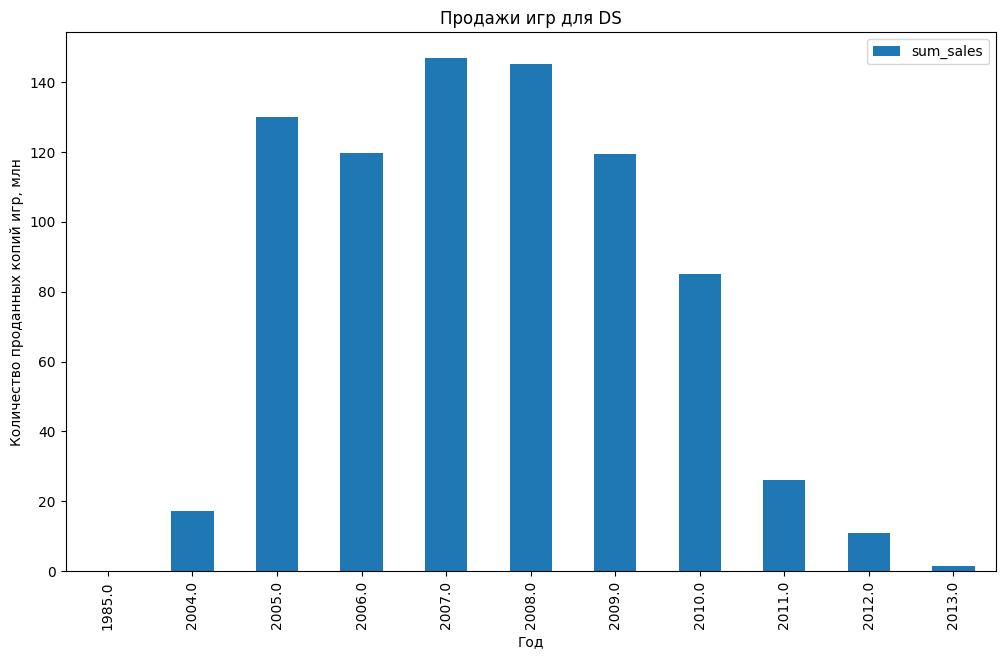

In [ ]:
ds_sales_pivot_table = pd.pivot_table(
    data[data["platform"] == "DS"],
    index=["year_of_release"],
    values="sum_sales",
    aggfunc="sum",
)
ds_sales_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Год",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр для DS",
);

Для наглядности построим также график по распределению продаж по годам со всеми платформами на одном графике.

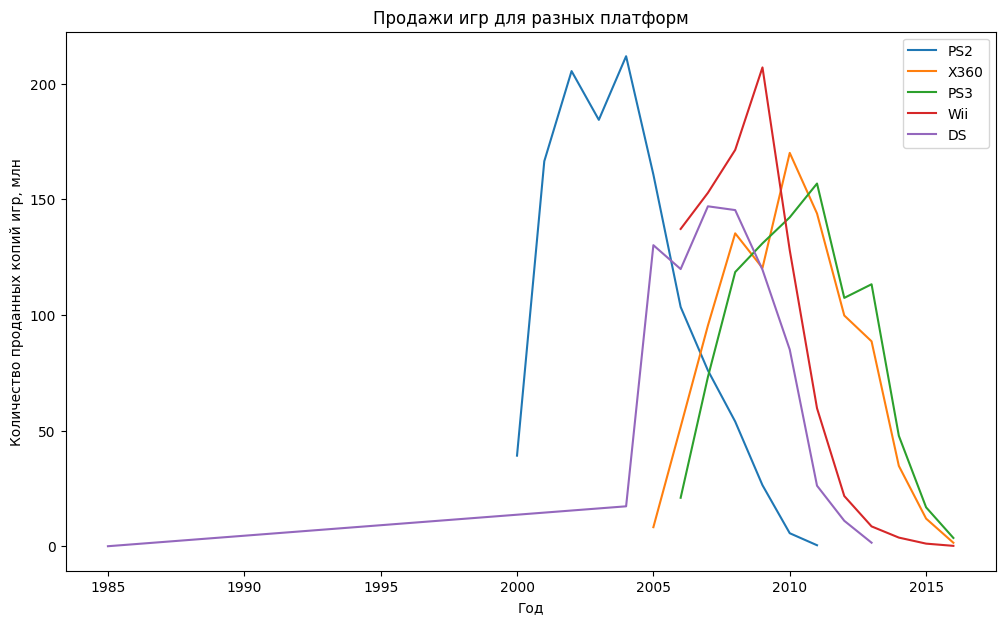

In [ ]:
platform = ["PS2", "X360", "PS3", "Wii", "DS"]
for row in platform:
    top_genres = (
        data.loc[data["platform"] == row].groupby("year_of_release")["sum_sales"].sum()
    )
    top_genres.name = row
    top_genres.plot(
        xlabel="Год",
        ylabel="Количество проданных копий игр, млн",
        title="Продажи игр для разных платформ",
        figsize=(12, 7),
        legend="true",
    );

Внезапно обнаружена аномалия, не замеченная раньше: у консоли DS есть продажи игр в 1985 году, когда о ней даже подумать не могли). Смотрим, о чём идёт речь.

In [ ]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15704,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,<NA>,NaN,no_rating,0.02


Либо это ошибка в целом, либо речь идёт о переиздании на DS какой-то старой игры, которую почему-то записали годом издания оригинала. В любом случае, удалим эту строку, чтобы не мешалась.

In [ ]:
data = data[data['name'] != 'Strongest Tokyo University Shogi DS']

Строим график ещё раз без этого аномального значения.

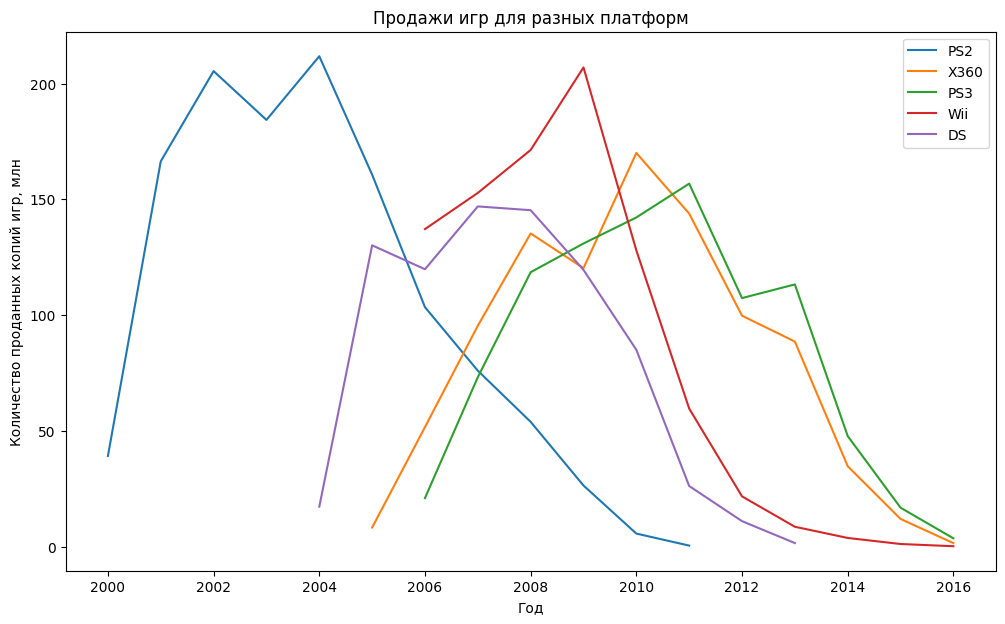

In [ ]:
platform = ["PS2", "X360", "PS3", "Wii", "DS"]
for row in platform:
    top_genres = (
        data.loc[data["platform"] == row].groupby("year_of_release")["sum_sales"].sum()
    )
    top_genres.name = row
    top_genres.plot(
        xlabel="Год",
        ylabel="Количество проданных копий игр, млн",
        title="Продажи игр для разных платформ",
        figsize=(12, 7),
        legend="true",
    );

Графики соответствуют реальном положению вещей: срок жизни консоли в среднем порядка 10 лет, дальше поддержка разработчиками прекращается в угоду более новому поколению приставок, новых игр на платформу не выходит, так что их продажи становятся минимальными. Также по графикам можно сделать вывод, что по количеству проданных игр лучше всех из перечисленных консолей стартовала Nintendo Wii, что вполне логично, учитывая, что эта консоль была ориентирована на максимально широкую целевую аудиторию.

Актуальным периодом, информацию за который надо рассмотреть для составления прогноза на 2017 год, я считаю промежуток начиная с 2013-го года, так как именно тогда были выпущены всё ещё актуальные на 2017-ый консоли PS4 и Xbox One, игры для которых будут продаваться в 2017-ом активнее всего, но и предыдущее поколение консолей к тому времени продолжает быть востребованным.

Отсекаем от исходного датасета информацию за актуальный период, необходимую для прогноза.

In [ ]:
data_forecast = data[data['year_of_release'] > 2012]
display(data_forecast.head())
data_forecast.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,no_rating,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


Делаем сводную таблицу для определения платформ, на которых продалось больше всего игр за актуальный период, строим по ней график.

In [ ]:
data_forecast_years_sum = pd.pivot_table(
    data_forecast, index="platform", values="sum_sales", aggfunc="sum"
)
data_forecast_years_sum.sort_values("sum_sales", ascending=False)


,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


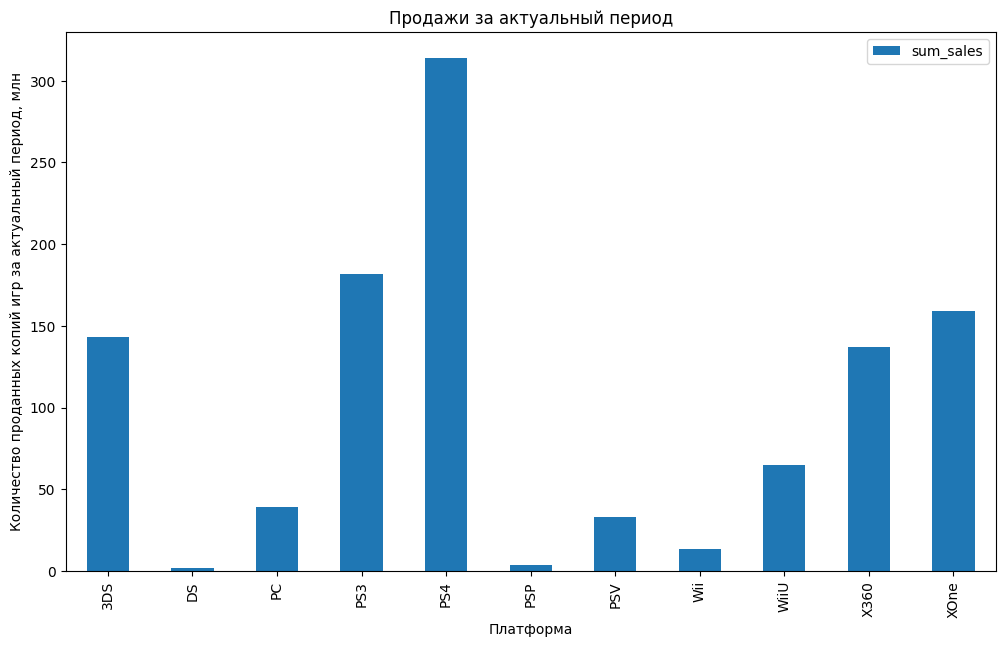

In [ ]:
data_forecast_years_sum.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Платформа",
    ylabel="Количество проданных копий игр за актуальный период, млн",
    title="Продажи за актуальный период",
);

Итого, пятёрка платформ по количеству проданных игр за этот период: PS4, PS3, Xbox One, Nintendo 3DS, Xbox 360. Теперь посмотрим, как изменялись продажи игр по годам. Построим сводную таблицу, а после сделаем по ней график.

In [ ]:
data_forecast_years = pd.pivot_table(data_forecast, index=['platform','year_of_release'], values='sum_sales', aggfunc = 'sum')
data_forecast_years

sum_sales
platform year_of_release           
3DS      2013.0               56.57
         2014.0               43.76
         2015.0               27.78
         2016.0               15.14
DS       2013.0                1.54
PC       2013.0               12.38
         2014.0               13.28
         2015.0                8.52
         2016.0                5.25
PS3      2013.0              113.25
         2014.0               47.76
         2015.0               16.82
         2016.0                3.60
PS4      2013.0               25.99
         2014.0              100.00
         2015.0              118.90
         2016.0               69.25
PSP      2013.0                3.14
         2014.0                0.24
         2015.0                0.12
PSV      2013.0               10.59
         2014.0               11.90
         2015.0                6.25
         2016.0                4.25
Wii      2013.0                8.59
         2014.0                3.75
         2015.0                1.14
         2016.0                0.18
WiiU     2013.0               21.65
         2014.0               22.03
         2015.0               16.35
         2016.0                4.60
X360     2013.0               88.58
         2014.0               34.74
         2015.0               11.96
         2016.0                1.52
XOne     2013.0               18.96
         2014.0               54.07
         2015.0               60.14
         2016.0               26.15

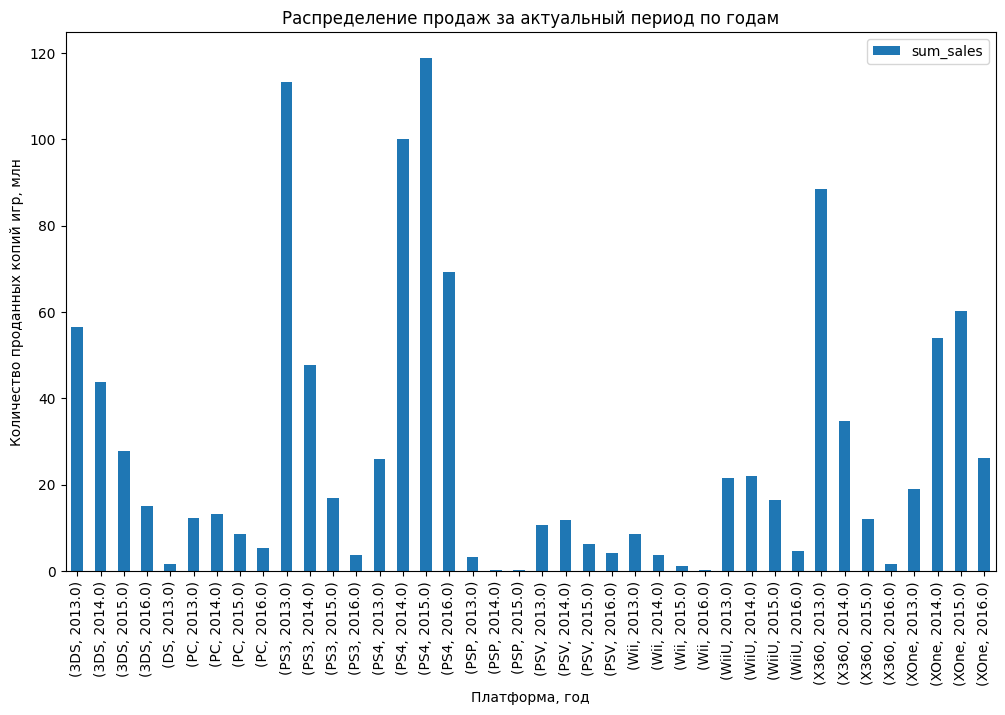

In [ ]:
data_forecast_years.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Платформа, год",
    ylabel="Количество проданных копий игр, млн",
    title="Распределение продаж за актуальный период по годам",
);

Потенциально прибыльными на 2017-ый год платформами являются PS4, Xbox One, PS Vita, Nintendo 3DS и Wii U: это консоли актуального поколения, игр для них выходит больше всего. Приставки старого поколения: PS3, Nintendo DS, PSP, Nintendo Wii, Xbox 360 уже доживают свой срок и не являются потенциально прибыльными. Платформу PC я бы отнёс скорее к потенциально прибыльным, несмотря на падение продаж, начиная с 2014-го года, в силу её универсальности.

Строим "ящики с усами" для всех платформ.

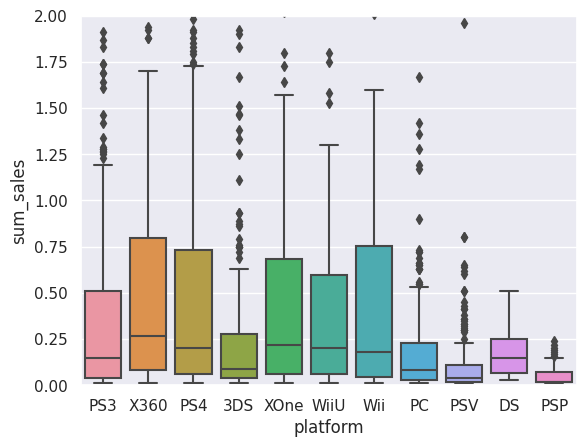

In [ ]:
sns.boxplot(data=data_forecast, x='platform', y='sum_sales').set_ylim(0,2);

Смотрим статистику по суммарным продажам конкретных игр в целом за актуальный период.

In [ ]:
data_forecast['sum_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: sum_sales, dtype: float64

А теперь для игр на каждой из рассмотренных платформ по отдельности.

In [ ]:
ps4_data = data_forecast.query('platform =="PS4"')
ps4_data['sum_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

In [ ]:
xone_data = data_forecast.query('platform =="XOne"')
xone_data['sum_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64

In [ ]:
psv_data = data_forecast.query('platform =="PSV"')
psv_data['sum_sales'].describe()

count    358.000000
mean       0.092151
std        0.153816
min        0.010000
25%        0.020000
50%        0.040000
75%        0.110000
max        1.960000
Name: sum_sales, dtype: float64

In [ ]:
ds3_data = data_forecast.query('platform =="3DS"')
ds3_data['sum_sales'].describe()

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: sum_sales, dtype: float64

In [ ]:
wiiu_data = data_forecast.query('platform =="WiiU"')
wiiu_data['sum_sales'].describe()

count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: sum_sales, dtype: float64

In [ ]:
pc_data = data_forecast.query('platform =="PC"')
pc_data['sum_sales'].describe()

count    189.000000
mean       0.208624
std        0.352304
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        3.050000
Name: sum_sales, dtype: float64

Итого.

Общие значения:
- Максимум 21 млн долларов;
- Cреднее значение 488 тыс долларов;
- Третий квартиль 400 тыс долларов.

Игры на Playstation 4:
- Максимум 14.6 млн долларов;
- Среднее значение 801 тыс долларов.
- Третий квартиль 730 тыс долларов.

Игры на XBox One:
- Максимум 7.4 млн долларов;
- Среднее значение 645 тыс долларов.
- Третий квартиль 685 тыс долларов.

Игры на Playstation Vita:
- Максимум 1.96 млн долларов;
- Среднее значение 92 тыс долларов.
- Третий квартиль 110 тыс долларов.

Игры на Nintendo 3DS:
- Максимум 14.6 млн долларов;
- Среднее значение 472 тыс долларов.
- Третий квартиль 280 тыс долларов.

Игры на Nintendo Wii U:
- Максимум 14.6 млн долларов;
- Среднее значение 562 тыс долларов.
- Третий квартиль 595 тыс долларов.

Игры на PC:
- Максимум 3.05 млн долларов;
- Среднее значение 208 тыс долларов.
- Третий квартиль 230 тыс долларов.

Определяем влияние на продажи платформы PS4 оценок критиков и пользователей.

In [ ]:
ps4_data_critics_users = ps4_data.loc[
    :, ["sum_sales", "critic_score", "user_score"]
]  # берём из таблицы только нужные нам столбцы
ps4_data_critics_users.head()  # проверяем


,sum_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [ ]:
ps4_data_critics_users.corr() #находим коэффициенты Пирсона

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


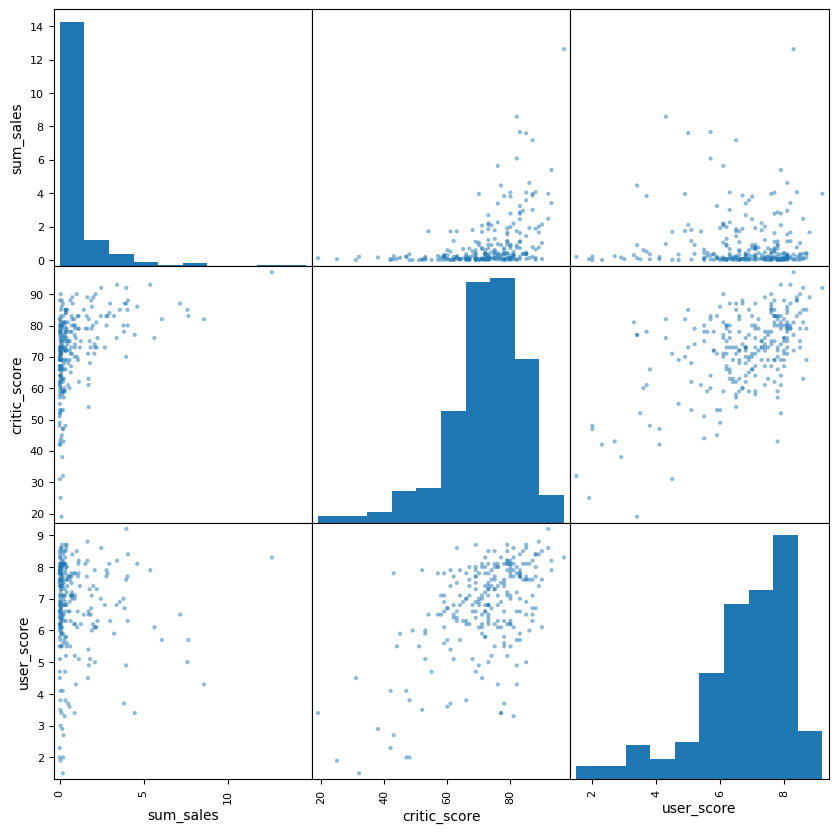

In [ ]:
pd.plotting.scatter_matrix(ps4_data_critics_users, figsize=(10, 10));

Для платформы PlayStation 4 обнаружена средняя связь (коэффициент корреляции Пирсона 0.4) продаж игры и оценок критиков. Более высокие оценки критиков повышают продажи игры, но далеко не всегда. Отрицательная корреляция продаж и оценок игроков скорее всего ошибочна.

Проведём аналогичное исследование для оставшихся потенциально прибыльных платформ.

In [ ]:
xone_data_critics_users = xone_data.loc[:, ["sum_sales", "critic_score", "user_score"]]
xone_data_critics_users.head()

,sum_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
241,4.49,84.0,6.4
269,4.22,88.0,6.2


In [ ]:
xone_data_critics_users.corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


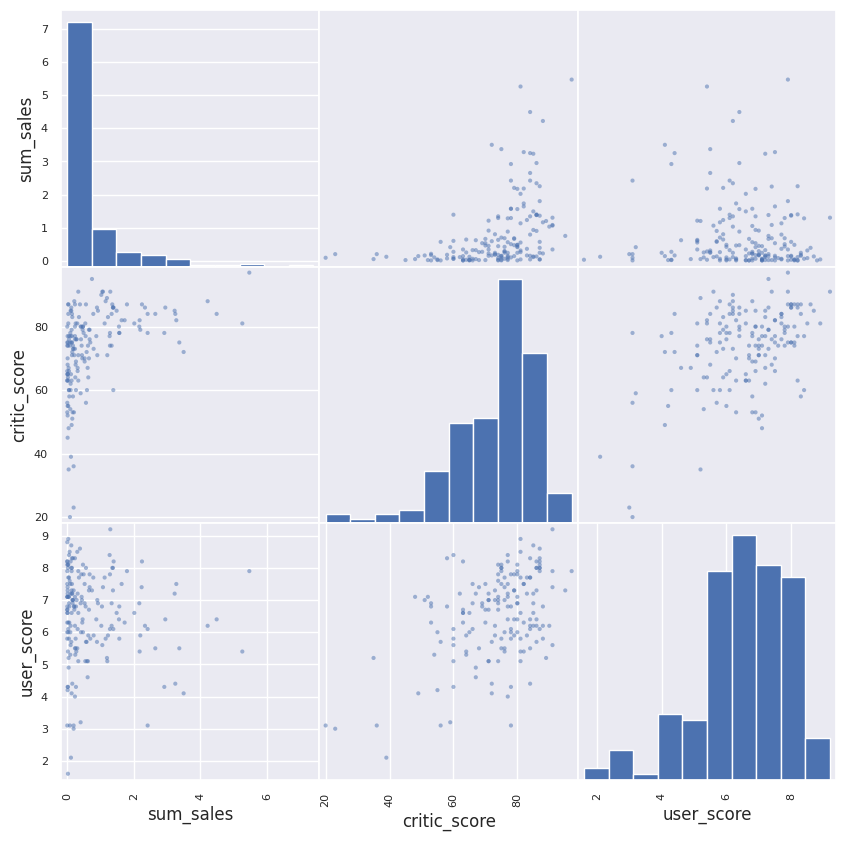

In [ ]:
pd.plotting.scatter_matrix(xone_data_critics_users, figsize=(10, 10));

Для консоли XBox One ситуация аналогичная относительно PS4. Коэффициент корреляции суммы продаж и мнения критиков 0.41.

In [ ]:
psv_data_critics_users = psv_data.loc[:, ['sum_sales', 'critic_score', 'user_score']]
psv_data_critics_users.head()

,sum_sales,critic_score,user_score
857,1.96,NaN,NaN
2530,0.80,78.0,8.9
2533,0.80,86.0,8.5
3044,0.65,73.0,8.3
3085,0.64,64.0,7.6


In [ ]:
psv_data_critics_users.corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.254742,0.000942
critic_score,0.254742,1.000000,0.611521
user_score,0.000942,0.611521,1.000000


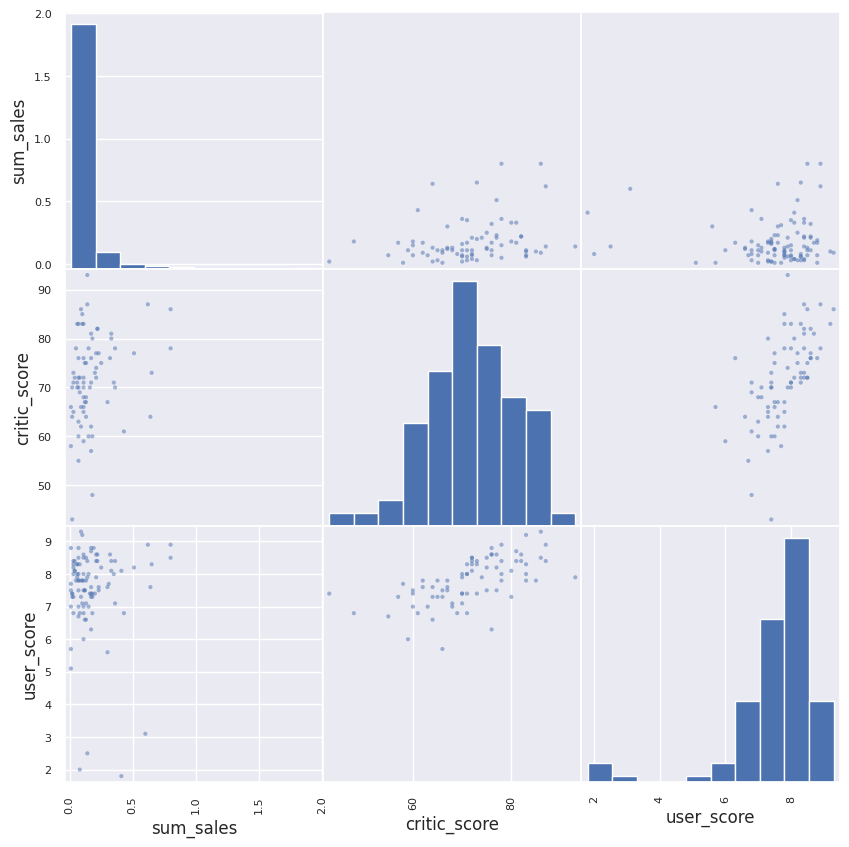

In [ ]:
pd.plotting.scatter_matrix(psv_data_critics_users, figsize=(10, 10));

У PS Vita влияние оценок критиков на продажи слабое, оценок игроков - фактически отсутствует.

In [ ]:
ds3_data_critics_users = ds3_data.loc[:, ['sum_sales', 'critic_score', 'user_score']]
ds3_data_critics_users.head()

,sum_sales,critic_score,user_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
183,5.22,NaN,NaN


In [ ]:
ds3_data_critics_users.corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


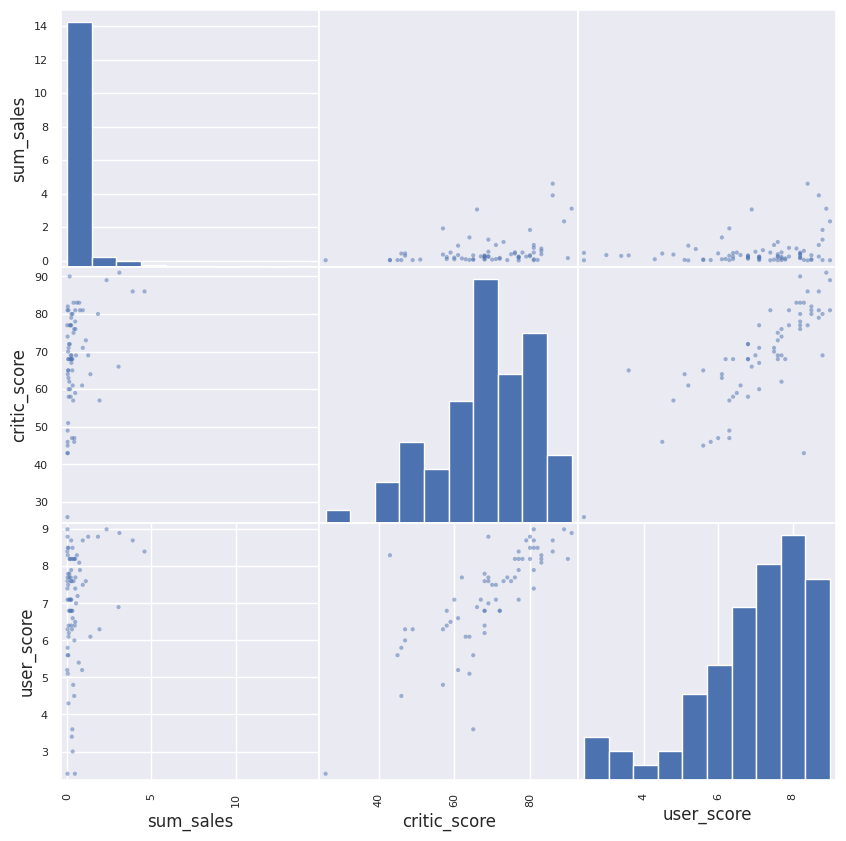

In [ ]:
pd.plotting.scatter_matrix(ds3_data_critics_users, figsize=(10, 10));

У Nintendo 3DS влияние оценок критиков и пользователей на продажи слабое (коэффициенты корреляции 0.35 и 0.24 соответственно).

In [ ]:
wiiu_data_critics_users = wiiu_data.loc[:, ['sum_sales', 'critic_score', 'user_score']]
wiiu_data_critics_users.head()

,sum_sales,critic_score,user_score
110,7.09,88.0,9.1
215,4.87,NaN,NaN
246,4.44,81.0,8.5
259,4.32,93.0,9.0
422,3.21,88.0,8.7


In [ ]:
wiiu_data_critics_users.corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.376415,0.419330
critic_score,0.376415,1.000000,0.721313
user_score,0.419330,0.721313,1.000000


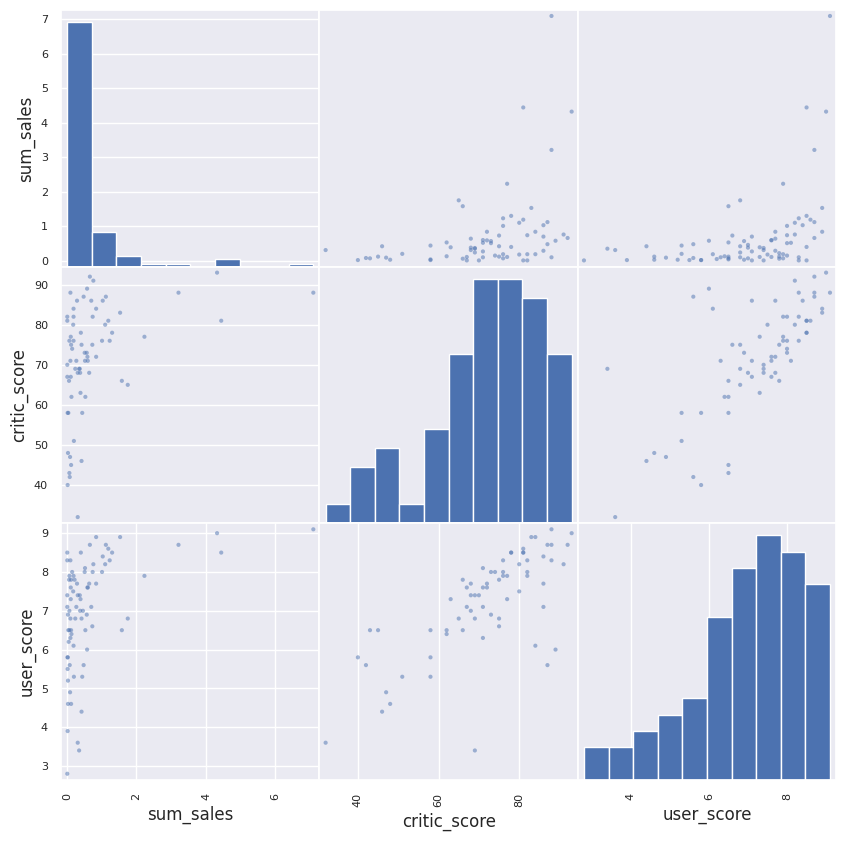

In [ ]:
pd.plotting.scatter_matrix(wiiu_data_critics_users, figsize=(10, 10));

Для Wii U наблюдается умеренное влияние оценок критиков и игроков на продажи.

In [ ]:
pc_data_critics_users = pc_data.loc[:, ['sum_sales', 'critic_score', 'user_score']]
pc_data_critics_users.head()

,sum_sales,critic_score,user_score
455,3.05,70.0,3.9
1084,1.67,86.0,7.9
1337,1.42,64.0,2.2
1423,1.36,81.0,6.0
1515,1.28,84.0,5.4


In [ ]:
pc_data_critics_users.corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


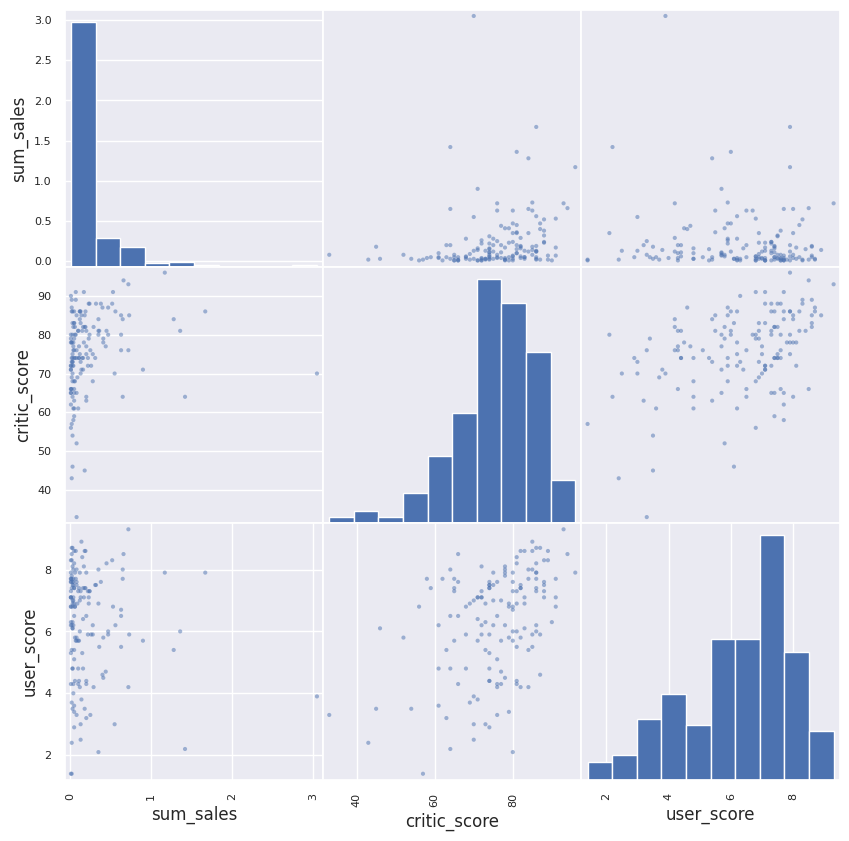

In [ ]:
pd.plotting.scatter_matrix(pc_data_critics_users, figsize=(10, 10));

Для персональных компьютеров влияние оценок критиков на продажи игр слабое (коэффициент Пирсона 0.19), отрицательный коэффициент влияния оценок пользователей считаю ошибкой.

Подытожим.
- Рассмотрено влияние оценок критиков и игроков на продажи игр для каждой из топ-платформ:  коэффициенты корреляций относительно невысокие, однако все же по критикам корреляция куда выше, нежели по пользователям.
- Также добавлю, что у всех из этих платформ, судя по коэффициенту корреляции, обнаружено влияние оценок критиков на оценки пользователей. Что вполне логично: очень редко оценки СМИ и рядовых игроков рознятся слишком сильно.

Для определения того, какие жанры продаются в среднем лучше других, создадим сводную таблицу с медианным значением продаж для каждого жанра и построим по ней столбчатую диаграмму.

In [ ]:
genre_sales_median_pivot_table = pd.pivot_table(
    data_forecast, index="genre", values="sum_sales", aggfunc="median"
)  # строим сводную таблицу по жанрам игр и их суммарным продажам
genre_sales_median_pivot_table.sort_values("sum_sales", ascending=False)


,sum_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


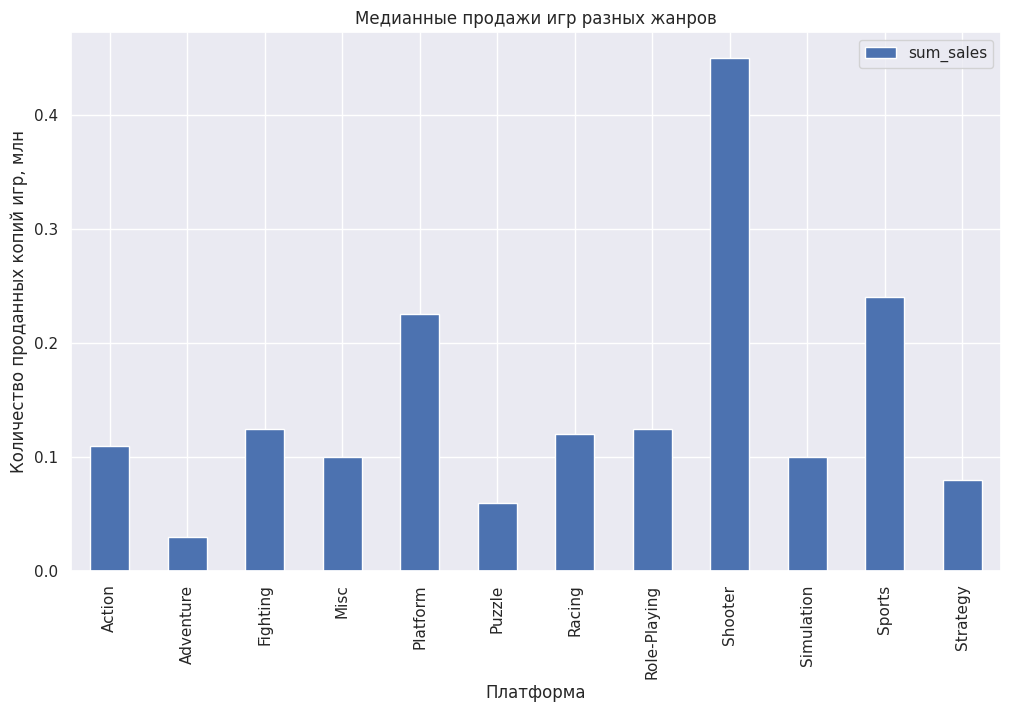

In [ ]:
genre_sales_median_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Платформа",
    ylabel="Количество проданных копий игр, млн",
    title="Медианные продажи игр разных жанров",
);


Наиболее успешными по продажам являются игры жанров Action, Sports и Platform. Это вполне логично, учитывая, что шутеров обычно достаточно низкий порог вхождения. В спортивные симуляторы часто играют люди, не интересующиеся видеоиграми других жанров. Платформеры часто ориентированы на широкую аудиторию, включая детей.

## Выводы по разделу.
- Даны ответы на поставленные в задании вопросы.

# Составление портрета пользователя каждого региона.

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Сначала определим популярность платформ по регионам. Построим топ платформ для каждого региона и построим графики для пяти самых популярных.

In [ ]:
na_region = data_forecast.query('na_sales > 0')
eu_region = data_forecast.query('eu_sales > 0')
jp_region = data_forecast.query('jp_sales > 0')

In [ ]:
platforms_na_pivot_table = pd.pivot_table(
    na_region, index="platform", values="na_sales", aggfunc="sum"
).sort_values("na_sales", ascending=False)
platforms_na_pivot_table

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


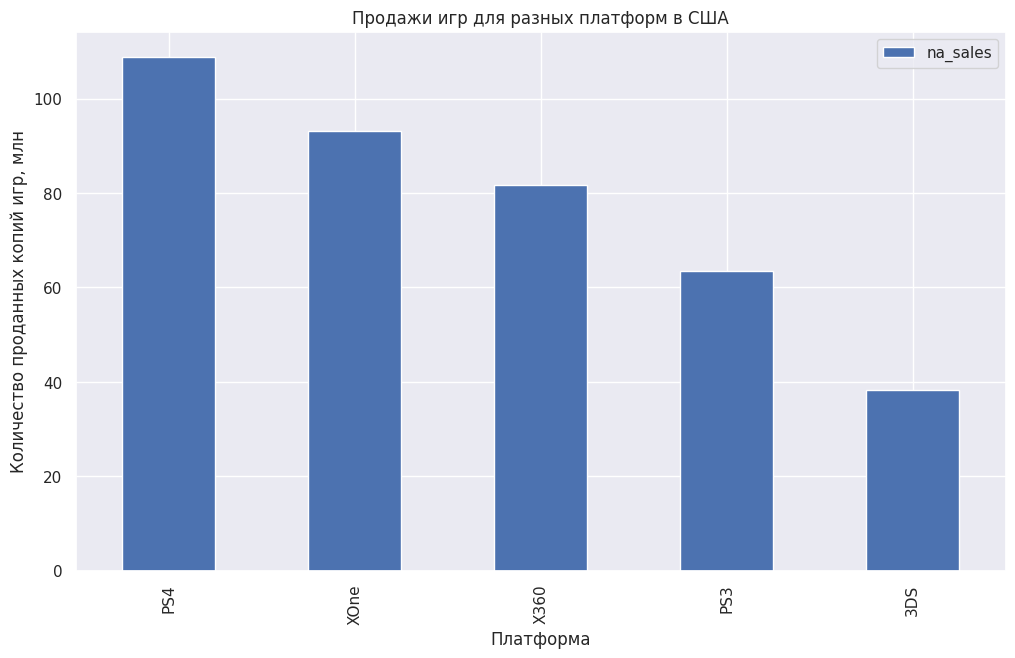

In [ ]:
platforms_na_pivot_table.head(5).plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Платформа",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр для разных платформ в США",
);

In [ ]:
platforms_eu_pivot_table = pd.pivot_table(
    eu_region, index="platform", values="eu_sales", aggfunc="sum"
).sort_values("eu_sales", ascending=False)
platforms_eu_pivot_table

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


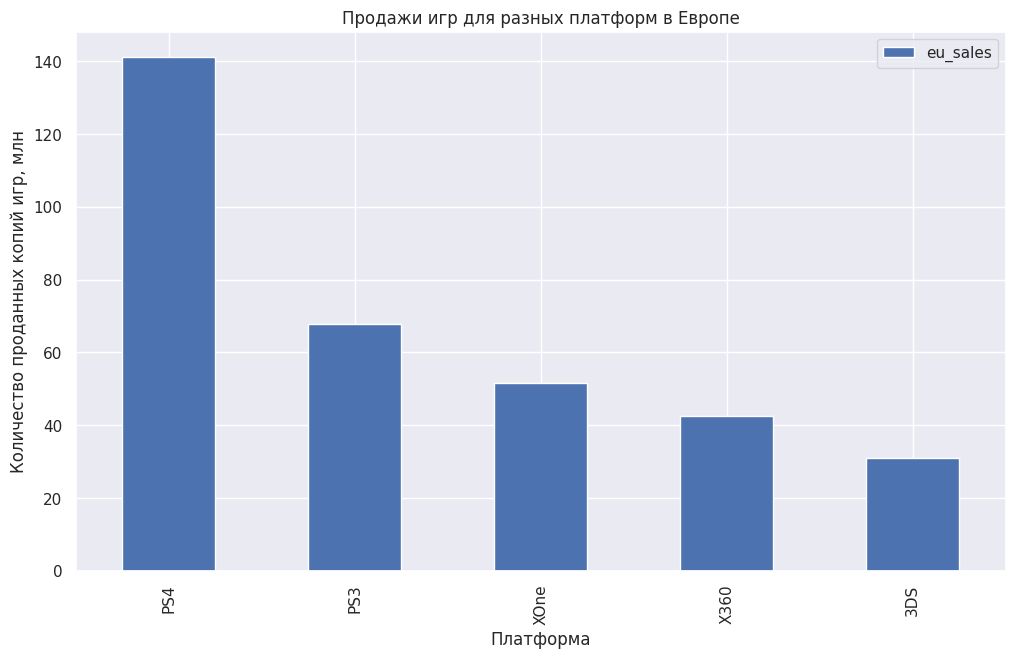

In [ ]:
platforms_eu_pivot_table.head(5).plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Платформа",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр для разных платформ в Европе",
);

In [ ]:
platforms_jp_pivot_table = pd.pivot_table(
    jp_region, index="platform", values="jp_sales", aggfunc="sum"
).sort_values("jp_sales", ascending=False)
platforms_jp_pivot_table.head(5)


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


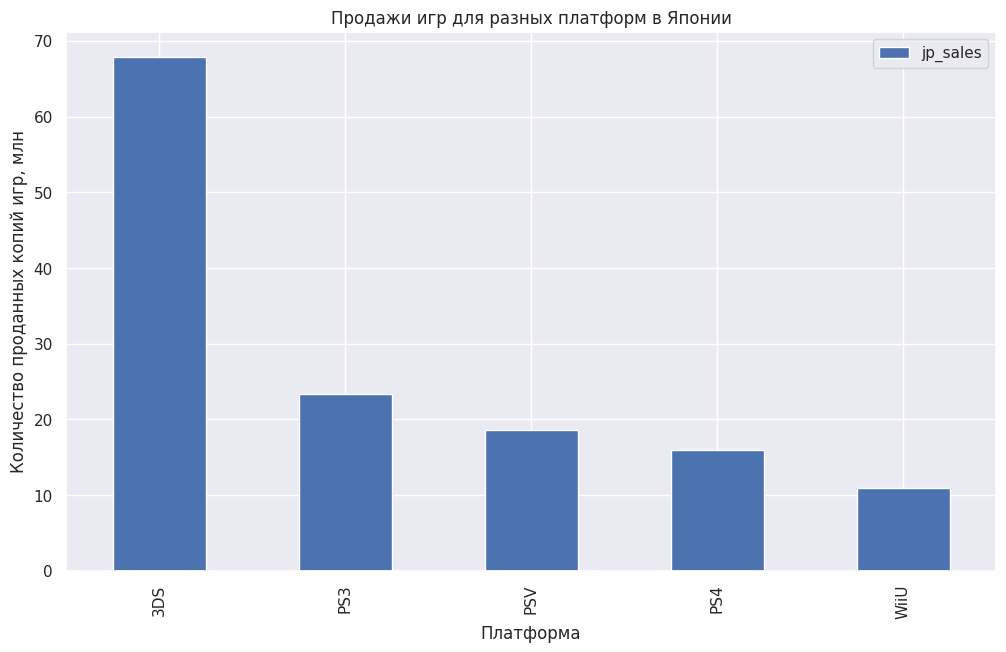

In [ ]:
platforms_jp_pivot_table.head(5).plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Платформа",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр для разных платформ в Японии",
);

Итого:
- Топ-5 платформ по продажам игр в США: PS4, XBox One, XBox 360, PS 3, Nintendo 3DS. PS4 лидирует как самая популярная в своём поколении консоль, успех XBox One и 360 обусловлен тем, что для Microsoft США - это домашний рынок, где она имеет огромное влияние. PS4 и XBox One являются прямыми конкурентами, будучи консолями одного поколения.
- Топ-5 платформ в Европе:  PS4, PS 3, XBox One, XBox 360, Nintendo 3DS. Здесь консоли Sony полностью обходят XBox последних двух поколений по продажам игр.
- Топ-5 платформ в Японии: 3DS, PS3, PS Vita, PS4, Wii U. Верхушка рынка видеоигр полностью поделена между конкурирующими японскими компаниями Nintendo и Sony. Детища Microsoft востребованы в Японии крайне мало.

In [ ]:
genres_na_pivot_table = pd.pivot_table(
    na_region, index="genre", values="na_sales", aggfunc="sum"
).sort_values("na_sales", ascending=False)
genres_na_pivot_table

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


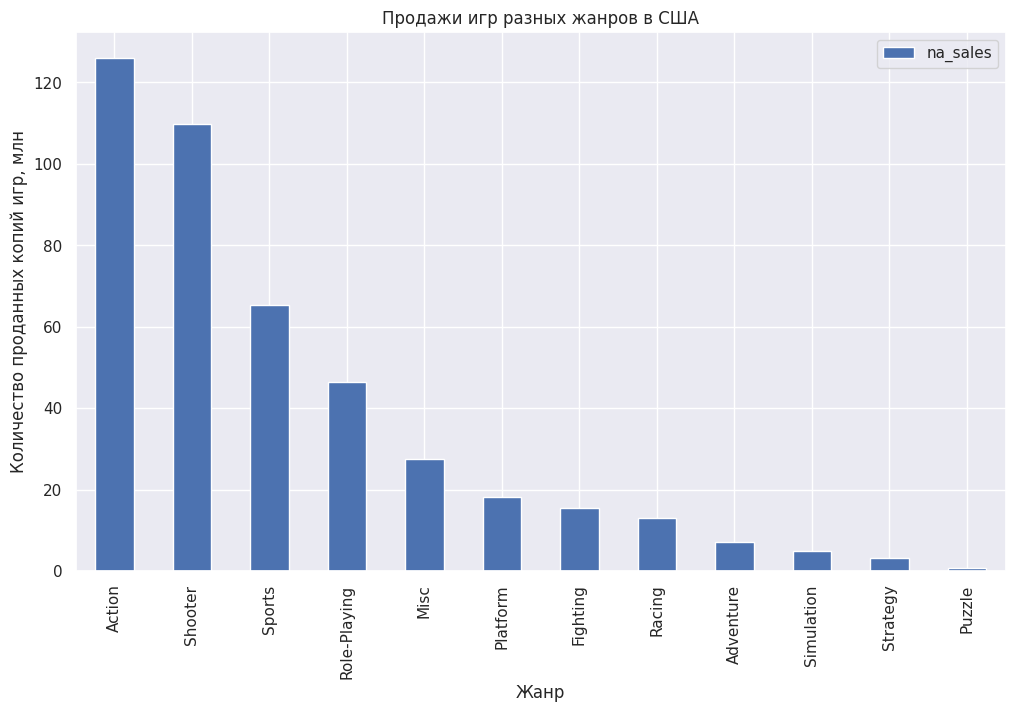

In [ ]:
genres_na_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Жанр",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр разных жанров в США",
);

In [ ]:
genres_eu_pivot_table = pd.pivot_table(
    eu_region, index="genre", values="eu_sales", aggfunc="sum"
).sort_values("eu_sales", ascending=False)
genres_eu_pivot_table

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


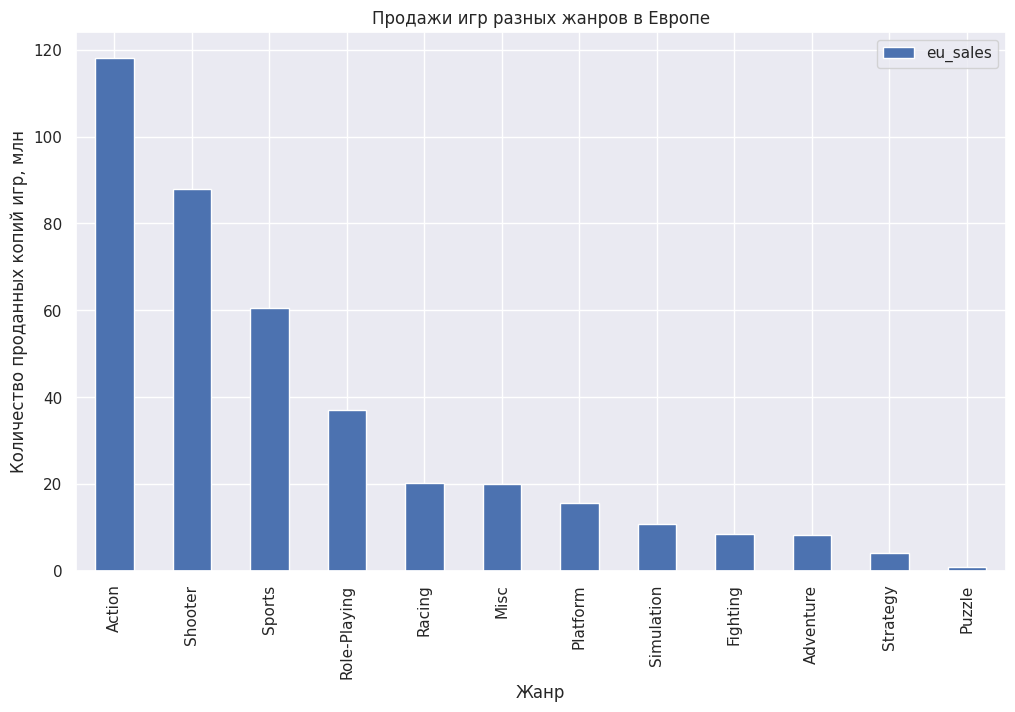

In [ ]:
genres_eu_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Жанр",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр разных жанров в Европе",
);

In [ ]:
genres_jp_pivot_table = pd.pivot_table(
    jp_region, index="genre", values="jp_sales", aggfunc="sum"
).sort_values("jp_sales", ascending=False)
genres_jp_pivot_table


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


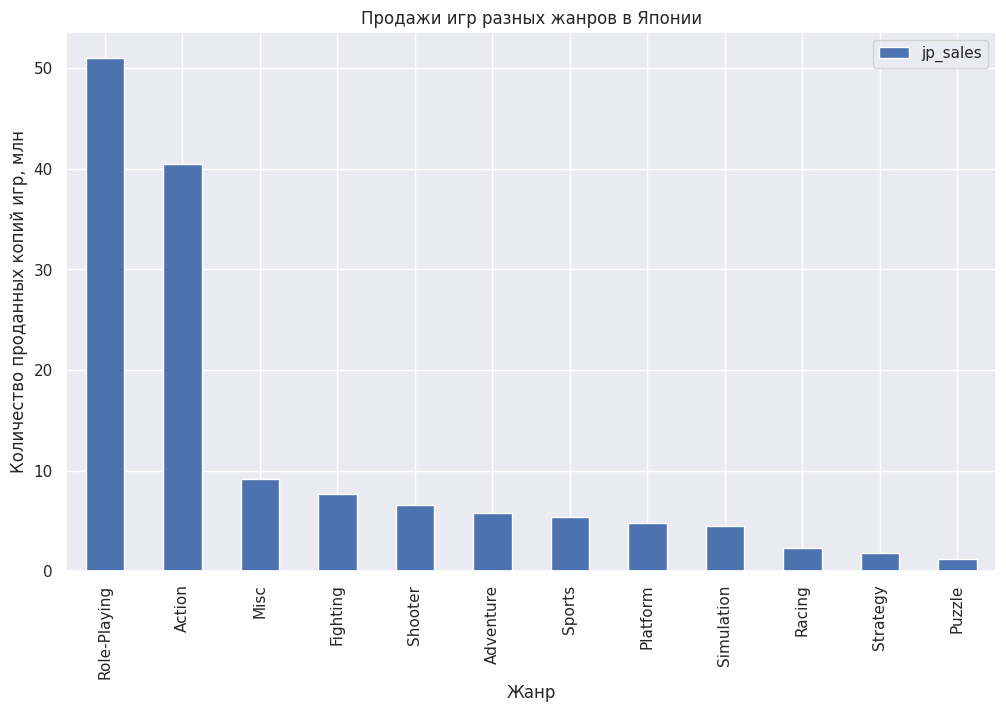

In [ ]:
genres_jp_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Жанр",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр разных жанров в Японии",
);

По поводу популярности жанров игр в разных регионов видно следующее:
- В США и Европе картина одинаковая: самыми популярными жанрами явяются Action, Shooter и Sports. Причины их популярности я уже рассматривал выше.
- В Японии ситуация иная. Первое место здесь занимает жанр RPG (Role-Playing), который исторически популярен в этом регионе настолько, что существует отдельный поджанр ролевых игр jRPG. Второе место заняли экшены, на третьем месте - жанр Misc. Это сокращение от miscellaneous, то есть "другое". В эту категорию отнесены игры, жанры которых не подходят под основные. В Японии имеют обширную популярность многие несовсем стандартные для европейских геймеров игры: танцевальные симуляторы, игры про покемонов и тд. Думаю, они как раз и составляют этот жанр в статистике.

In [ ]:
rating_na_pivot_table = pd.pivot_table(
    na_region, index="rating", values="na_sales", aggfunc="sum"
).sort_values("na_sales", ascending=False)
rating_na_pivot_table

,na_sales
rating,
M,165.21
no_rating,89.42
E,79.05
E10+,54.24
T,49.79


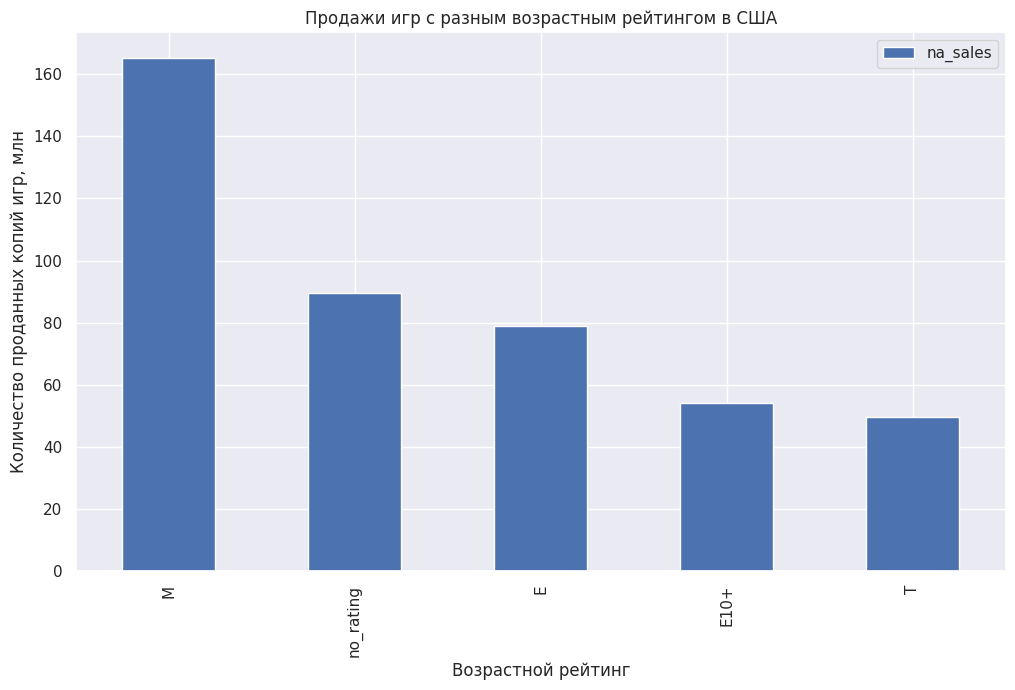

In [ ]:
rating_na_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Возрастной рейтинг",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр с разным возрастным рейтингом в США",
);

In [ ]:
rating_eu_pivot_table = pd.pivot_table(
    eu_region, index="rating", values="eu_sales", aggfunc="sum"
).sort_values("eu_sales", ascending=False)
rating_eu_pivot_table

,eu_sales
rating,
M,145.32
E,83.36
no_rating,78.91
E10+,42.69
T,41.95


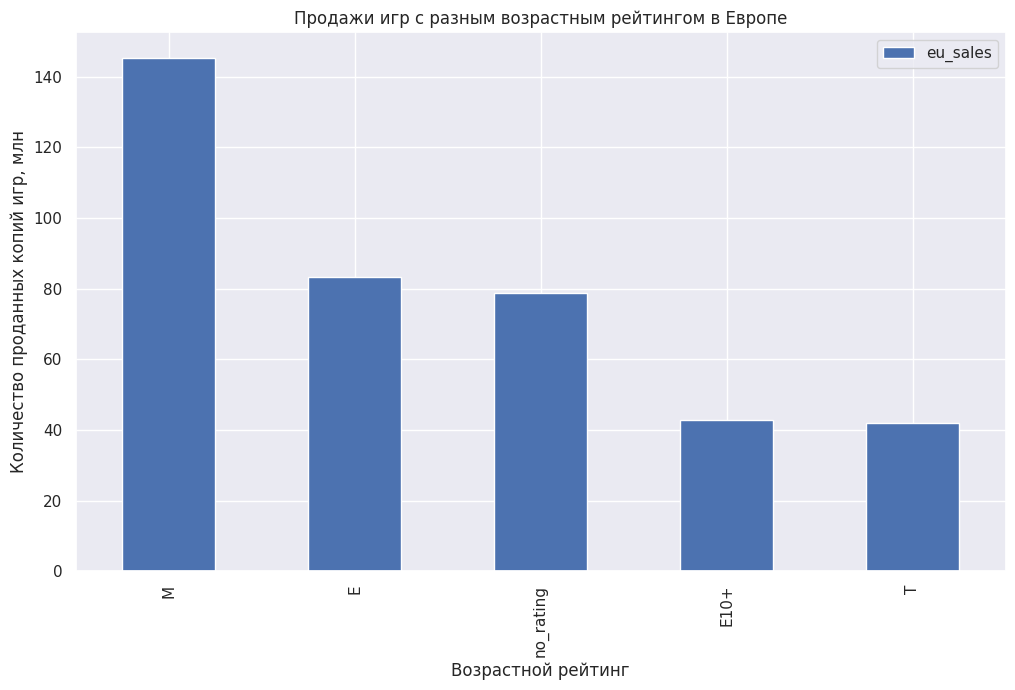

In [ ]:
rating_eu_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Возрастной рейтинг",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр с разным возрастным рейтингом в Европе",
);

In [ ]:
rating_jp_pivot_table = pd.pivot_table(
    jp_region, index="rating", values="jp_sales", aggfunc="sum"
).sort_values("jp_sales", ascending=False)
rating_jp_pivot_table

,jp_sales
rating,
no_rating,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


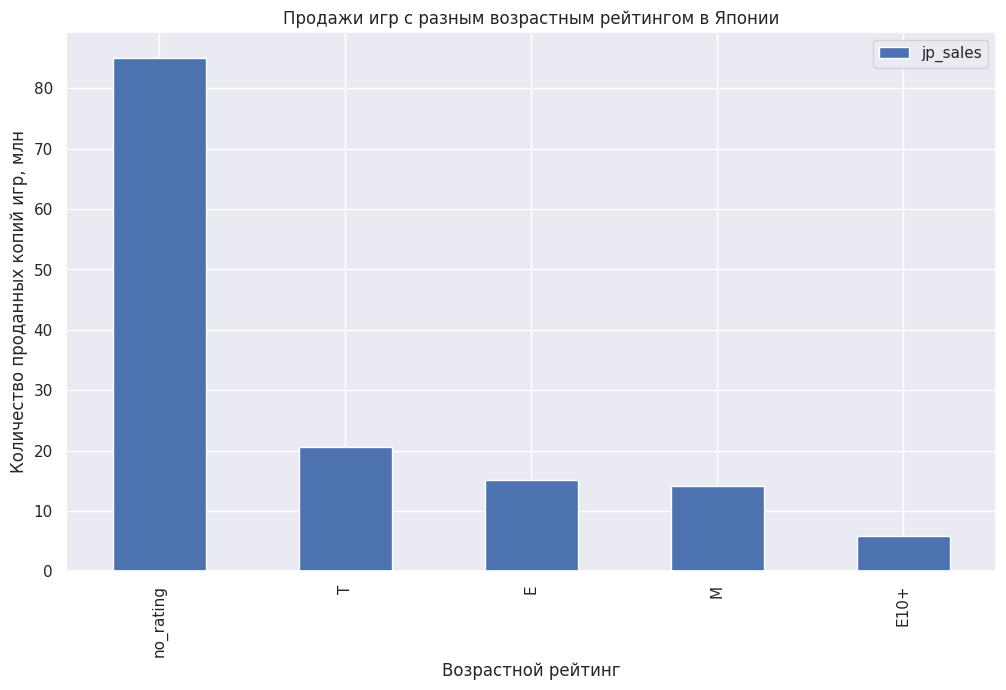

In [ ]:
rating_jp_pivot_table.plot(
    kind="bar",
    figsize=(12, 7),
    xlabel="Возрастной рейтинг",
    ylabel="Количество проданных копий игр, млн",
    title="Продажи игр с разным возрастным рейтингом в Японии",
);

Видим, что в Штатах и Европе ситуация одинакова: больше всего покупают игры с рейтингом M (17+). Для японского рынка чаще всего встречается значение "no_rating", которым мы заменили пропуски. Связано это с тем, что в Японии своя система возрастных рейтингов, отличная от ESRB, данных по которой у нас нет.

##Выводы по разделу.
- В США и Европе аудитория видеоигр выглядит очень похоже: им от 17 и более лет, из жанров они предпочитают в первую очередь экшены, шутеры и спортивные игры. Играют зачастую на домашних консолях PS4 и XBox One.
- В Японии ситуация отличается. Экшены по популярности у японских геймеров на втором месте, они любят РПГ и игры, не попадающие в основные жанровые категории. Играют японцы часто на портативных консолях 3DS и PS Vita. По возрастному показателю мы не можем сформировать вывод в виду отсутствия у нас информации.

# Проверка гипотез.

Необходимо проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки первой гипотезы получаем массивы с данными пользовательских оценок игр для XBox One и PC.

In [ ]:
data_xone_hypothesis = data_forecast.query('platform == "XOne"')["user_score"].dropna()
data_xone_hypothesis.describe()

count    182.000000
mean       6.521428
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [ ]:
data_pc_hypothesis = data_forecast.query('platform == "PC"')['user_score'].dropna()
data_pc_hypothesis.describe()

count    155.000000
mean       6.269678
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Проверяем первую гипотезу.

Нулевая гипотеза: "cредние пользовательские рейтинги платформ Xbox One и PC одинаковые", альтернативная : "cредние пользовательские рейтинги платформ Xbox One и PC разные".

Для проверки гипотезы будем применять t-тест. Значение критического уровня значимости задаём 0.01.

In [ ]:
alpha = .01
results = st.ttest_ind(
    data_xone_hypothesis,
    data_pc_hypothesis,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.147597032047728
Не получилось отвергнуть нулевую гипотезу


Делаем вывод, что cредние пользовательские рейтинги платформ Xbox One и PC в рассмотренной выборке одинаковы. Причина - политика компании Microsoft: все игры, выходящие на XBox One также выходят и на PC, так что различия между ними минимальны и касаются в основном технической части.

Делаем все те же действия по подготовке данных для проверки второй гипотезы.

In [ ]:
data_action_hypothesis = data_forecast.query('genre == "Action"')["user_score"].dropna()
data_action_hypothesis.describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [ ]:
data_sports_hypothesis = data_forecast.query('genre == "Sports"')['user_score'].dropna()
data_sports_hypothesis.describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Проверяем вторую гипотезу.

Нулевая гипотеза: "cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые", альтернативная гипотеза: "cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Для проверки гипотезы будем применять t-тест. Значение критического уровня значимости задаём 0.01.

In [ ]:
alpha = .01
results = st.ttest_ind(
    data_action_hypothesis,
    data_sports_hypothesis,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4459989209941613e-20
Отвергаем нулевую гипотезу


Делаем вывод: да, экшены и спортивные игры из нашей выборки имеют разные оценки от пользователей. Это логично, учитывая, что в жанре экшен выходит много ААА-игр, они имеют часто мощную сюжетную составляющую и гораздо более технически совершенны в рамках текущего поколения игровых платформ, нежели спортивные симуляторы.

## Выводы по разделу.

- Обе данные нам на проверку гипотезы подтвердились.
- В силу того, что на консоли XBox One выходят точно те же игры, что и на персональных компьютерах, они имеют примерно одинаковые оценки.
- Игры жанра экшен гораздо сильнее определяют развитие игровой индустрии, нежели спортивные симуляторы.


# Итоговые выводы.

В ходе выолнения данного проекта:

- Была просмотрена таблица с данными, выявлены их аномалии и пропущенные значения.
- Выполнена предобработка данных: пропуски, где это возможно, были заполнены, в таблицу добавлен новый столбец суммарных продаж, проведена проверка на дубликаты и т. д.
- Выбран временной период актуальной информации и проведен анализ этих данных.
- На основе популярности по регионам продаж игр для разных платформ и их возрастных рейтингов, составлен портрет покупателя для каждого из регионов.
- Выполнена проверка выдвинутых в задании гипотез.

Подытожив всё вышеперчисленное, могу выдвинуть следующий список предложений для получения высоких продаж в 2017-ом году:

- Ориентироваться на актуальные игровые платформы этого поколения: PS4 (69.25 млн. копий игр продано в 2016-ом году) Xbox One (26.15 млн. копий), PS Vita (4.25 млн. копий), Nintendo 3DS (15.4 млн. копий) и Wii U (4.6 млн. копий), а также не теряющий (в глобальном плане) своей популярности PC (5.25 млн. копий).
- Из игровых жанров успех сулят Action, Shooter, Sports и RPG. Медианные продажи отдельных игр этих жанров 0.45, 0.24, 0.225 и 0.125 млн. копий соответственно.
- Для североамериканского и европейского рынков следует ориентироваться в первую очередь на покупателей от 17 лет и старше. Для японского рынка необходимо уточнить информацию по местной системе возрастного рейтинга игр для определения возрастной аудитории, на которую стоит ориентироваться.
- Следует учитывать в первую очередь оценки критиков, а не пользователей, потому что коэффициент корреляции оценки критиков и продаж игр для актуальных платформ выше, чем аналогичный коэффициент у оценки пользователей.